<a href="https://colab.research.google.com/github/data2450/EDA-analysis-on-diabetic-dataset/blob/master/EDA_on_diabetics_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url='https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'

In [ ]:
##loadind libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##loading the dataset
data=pd.read_csv(url)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
##checking foe missing values
data.isnull().sum()*100/len(data)
##no missing values

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
##checking the datatype and shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
##shape of the dataset
data.shape
## there are 9 columns and 768 rows

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


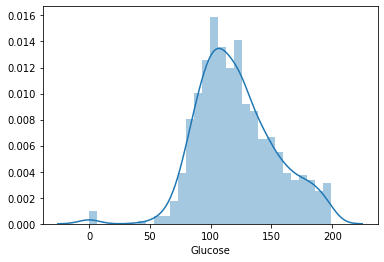

In [ ]:
##there are some problems in some of the columns
##the minimum values in columns like "Glucose" 	"BloodPressure" are "0" 0 is wrong entry lets remove it
sns.distplot(data.Glucose,bins=30)




In [ ]:
gl_0=data.loc[data['Glucose'] == 0,:]##checking the values with gp=0 full dataset
blp_0=data.loc[data['BloodPressure'] == 0,:]
blp_0.shape
len(data)
gl_0
len(data)

768

In [ ]:
blp_0.shape

(35, 9)

In [ ]:
gu_o=data['Glucose']==0 ##select dataset with gp=0
gpu_1=data[~gu_o]##select all other dataset excluding gp=0
gpu_1.shape


(763, 9)

In [ ]:
gu_bp=gpu_1['BloodPressure']==0 ##selecting dataes with bp=0
newdata=gpu_1[~gu_bp] ##selecting compliment of the above
newdata.shape##final dataset after removing the "0's"

(728, 9)

### EDA

In [ ]:
##since the dataset is clean lets starte EDA part
## the outcome column represent if the person is diabetic or not, "0" represent nondiabetic and "1" for diabetic
##lets look the count
newdata['Outcome'].value_counts()

0    478
1    250
Name: Outcome, dtype: int64

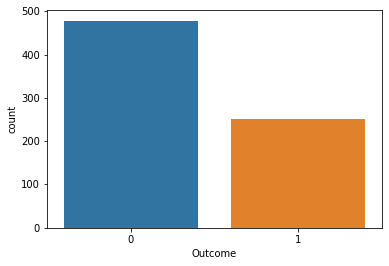

In [ ]:
sns.countplot('Outcome',data=newdata)

In [ ]:
##check some descriptive satitics of the dataset using .describe
newdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.862637,121.873626,72.438187,21.388736,84.152473,32.288736,0.476518,33.394231,0.343407
std,3.363422,30.679207,12.386109,15.729793,116.819934,7.277660,0.334851,11.849692,0.475172
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,33.000000,130.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


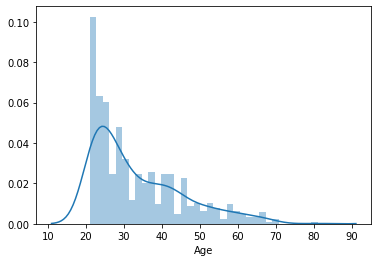

In [ ]:
##lests check the disribution of "age" varible
sns.distplot(newdata.Age,bins=35)
##age is right skewed

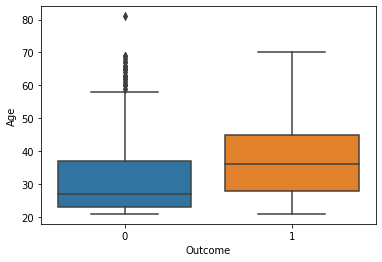

In [ ]:
##lets analyse age of the person and diaganosed with diabetics
sns.boxplot('Outcome','Age',data=newdata)

In [ ]:
non_diabetic=newdata[newdata['Outcome']==0]
non_diabetic['Age'].median()

27.0

In [ ]:
diabetic=newdata[newdata['Outcome']==1]
diabetic['Age'].median()##the median age of people with diabetics is more than people with nodiabetics

36.0

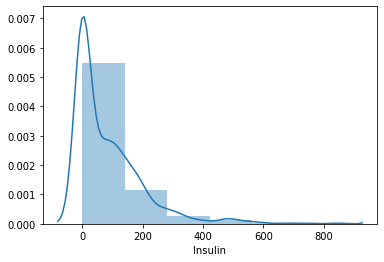

In [ ]:
sns.distplot(newdata.Insulin,bins=6)

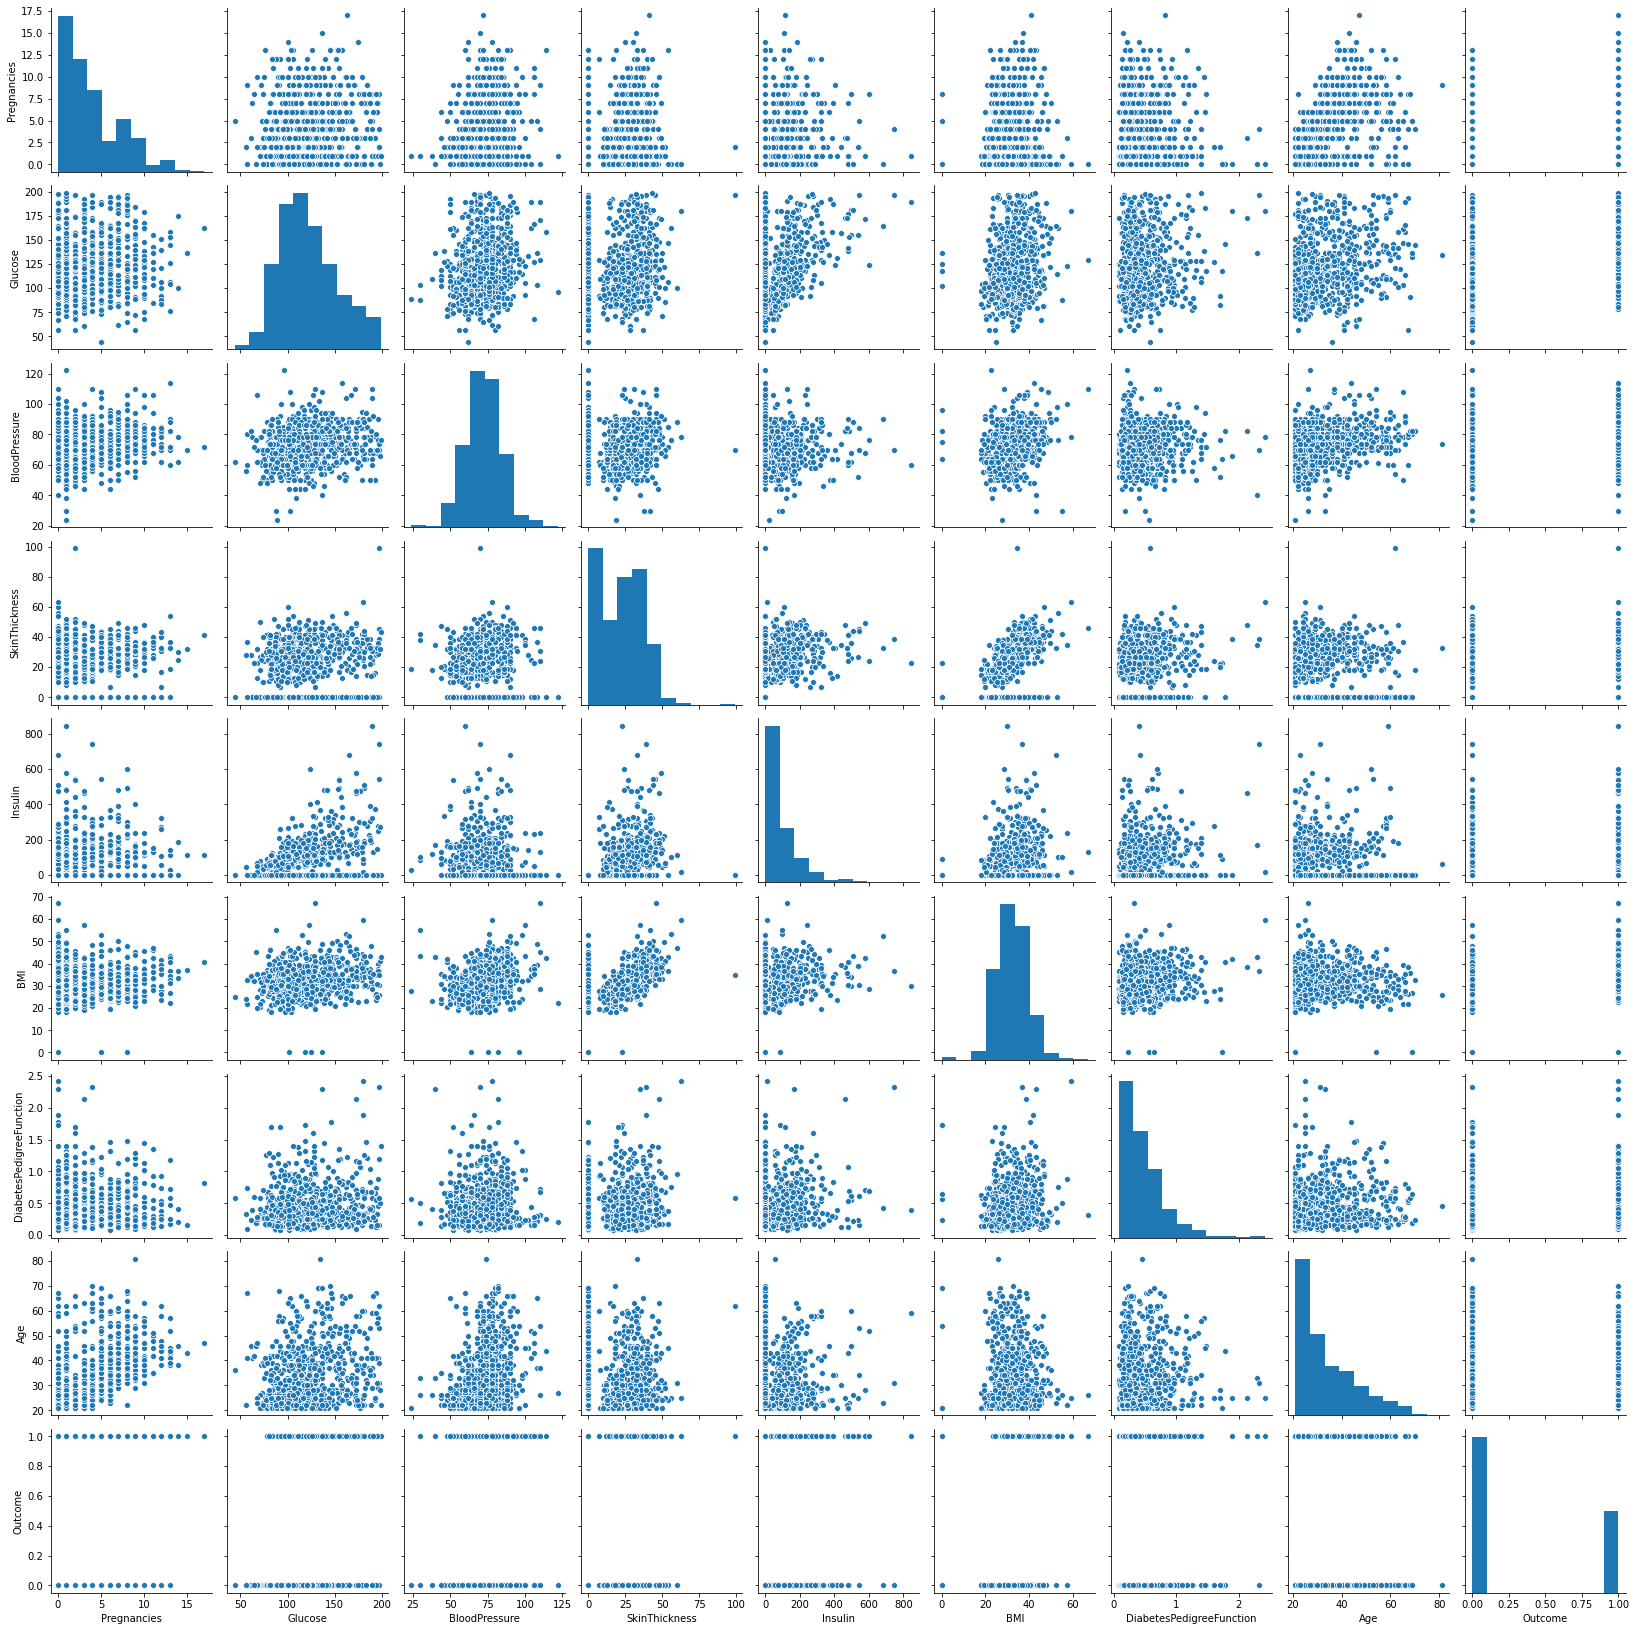

In [ ]:
sns.pairplot(newdata)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
newdata['Pregnancies'].value_counts()

1     131
0     101
2      96
3      72
4      65
5      56
6      46
7      42
8      37
9      28
10     22
11     10
12      9
13      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

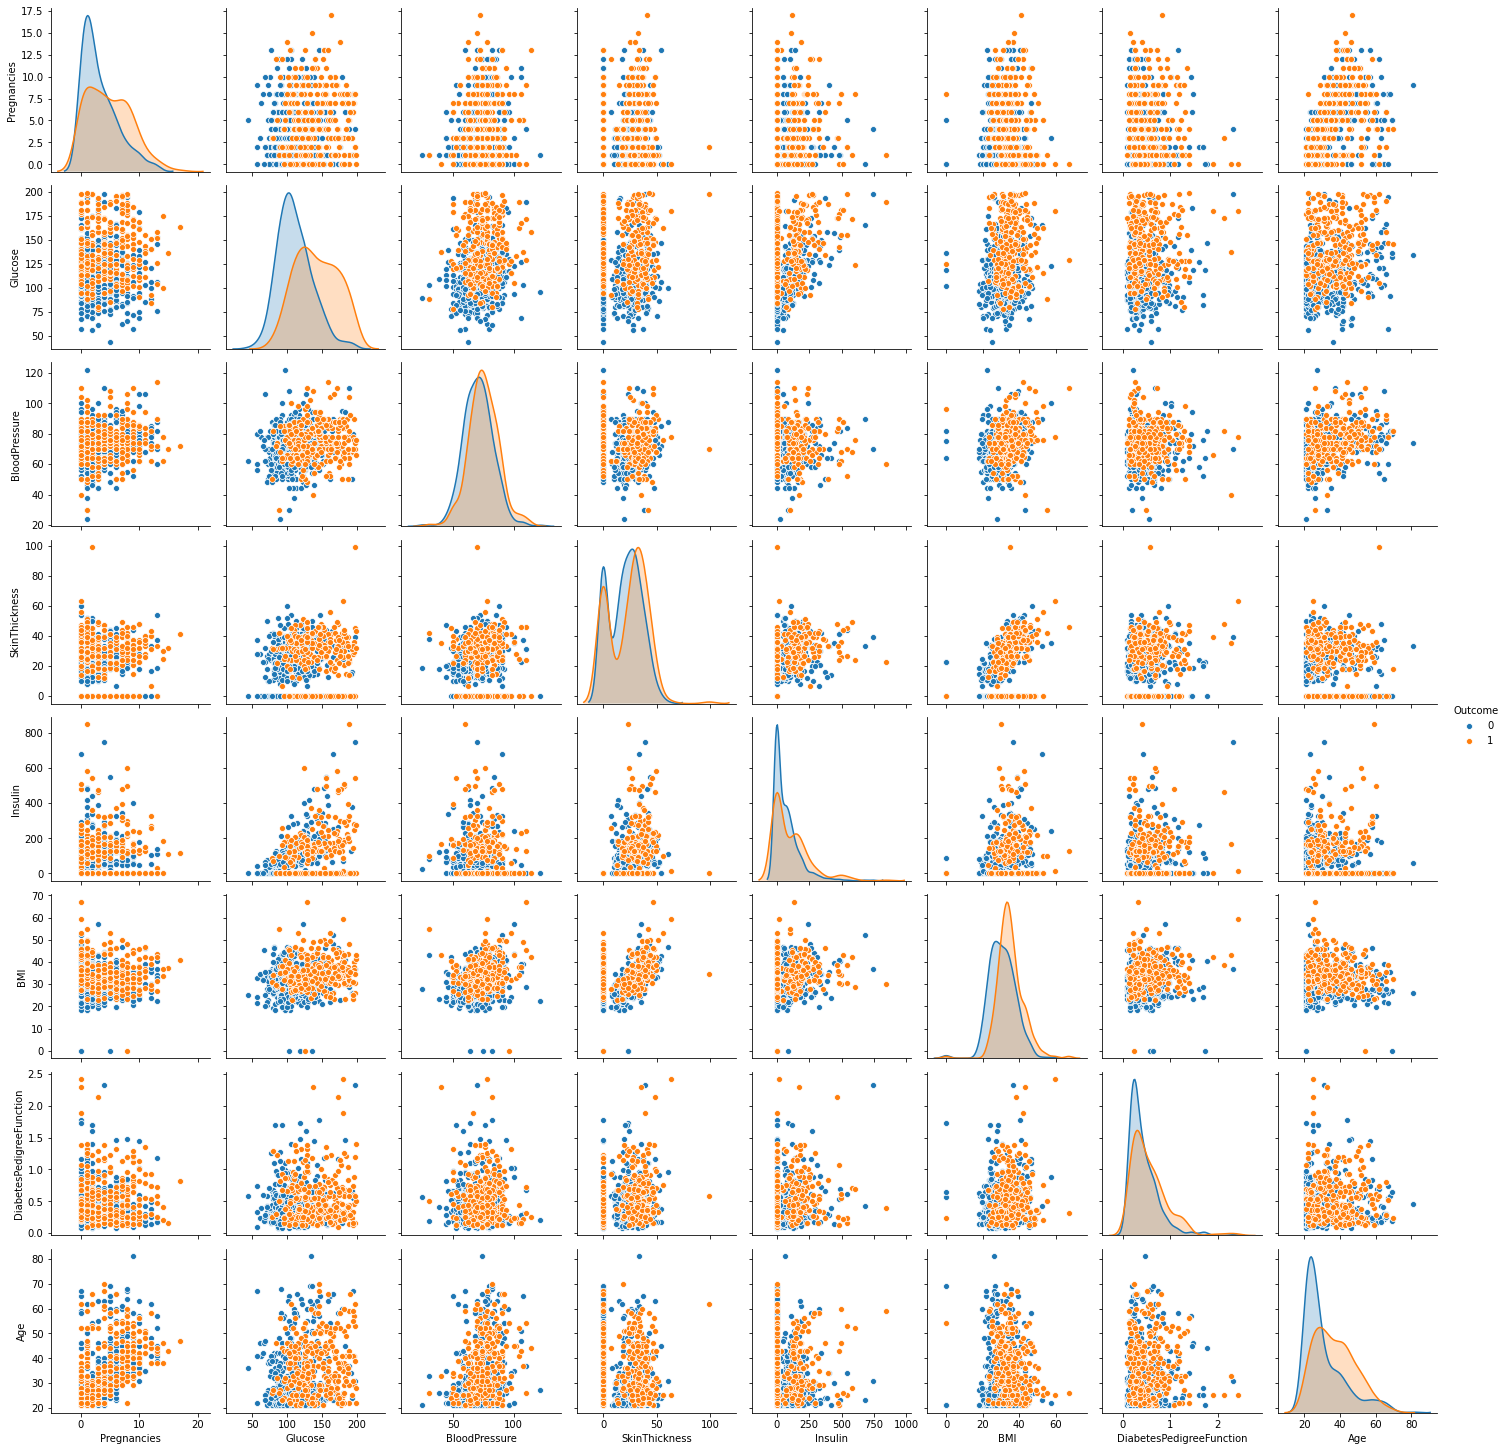

In [ ]:
sns.pairplot(newdata,hue='Outcome')

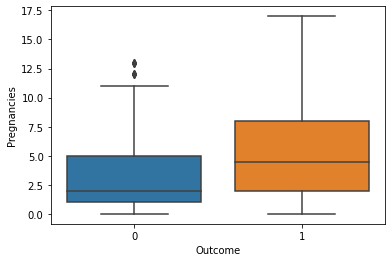

In [ ]:
sns.boxplot(x='Outcome',y='Pregnancies',data=newdata)

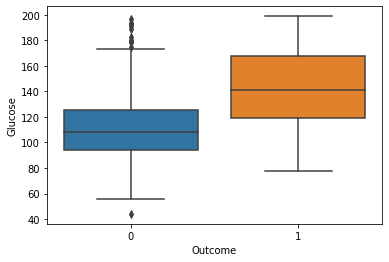

In [ ]:
sns.boxplot(x='Outcome',y='Glucose',data=newdata)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


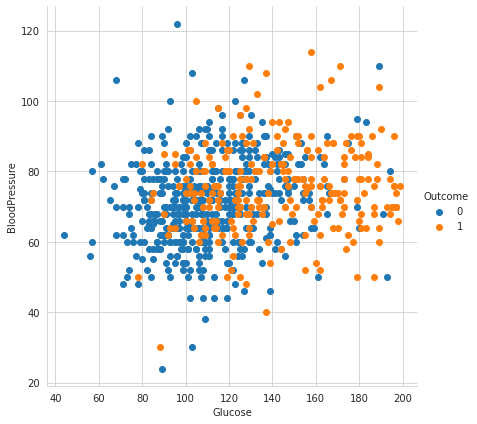

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(newdata, hue="Outcome", size=6) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend();
plt.show();

In [ ]:
##A BMI of less than 18.5 means that a person is underweight.
##A BMI of between 18.5 and 24.9 is ideal.
##A BMI of between 25 and 29.9 is overweight.
##A BMI over 30 indicates obesity.
#create a list of our condition
conditions=[
    (newdata['BMI']<18.5),
    (newdata['BMI']>=18.5) & (newdata['BMI']<25),
    (newdata['BMI']>=25) & (newdata['BMI']<30),
    (newdata['BMI']>=30)     
]      

In [ ]:
#create a list of the values we want to assign to each condtion
values=['underweight','ideal','overweight','obesity']

In [ ]:
#create a new column and use np.select to assign values to it using our lists as arguments
newdata['BMI_category']=np.select(conditions,values)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
##diplay updated datafrsme
newdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148,72,35,0,33.6,0.627,50,1,obesity
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,ideal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obesity


In [ ]:
newdata[['BMI','BMI_category']]

,BMI,BMI_category
0,33.6,obesity
1,26.6,overweight
2,23.3,ideal
3,28.1,overweight
4,43.1,obesity
...,...,...
763,32.9,obesity
764,36.8,obesity
765,26.2,overweight
766,30.1,obesity


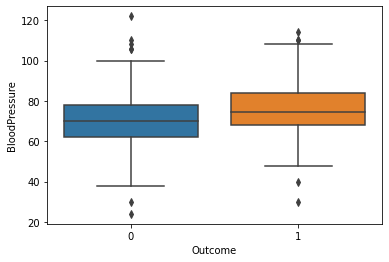

In [ ]:
sns.boxplot(x='Outcome',y='BloodPressure',data=newdata)

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    int64  
 1   Glucose                   728 non-null    int64  
 2   BloodPressure             728 non-null    int64  
 3   SkinThickness             728 non-null    int64  
 4   Insulin                   728 non-null    int64  
 5   BMI                       728 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       728 non-null    int64  
 8   Outcome                   728 non-null    int64  
 9   BMI_category              728 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 62.6+ KB


In [ ]:
##canging the datatype of BMI_category from object typr to category
for col in['BMI_category']:
  newdata[col]=newdata[col].astype('category')
##newdata['BMI_category']=pd.to_category(newdata['BMI_category'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
newdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               728 non-null    int64   
 1   Glucose                   728 non-null    int64   
 2   BloodPressure             728 non-null    int64   
 3   SkinThickness             728 non-null    int64   
 4   Insulin                   728 non-null    int64   
 5   BMI                       728 non-null    float64 
 6   DiabetesPedigreeFunction  728 non-null    float64 
 7   Age                       728 non-null    int64   
 8   Outcome                   728 non-null    int64   
 9   BMI_category              728 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 57.8 KB


In [ ]:
t=newdata.BMI_category.value_counts()
print(t)

obesity        453
overweight     171
ideal           96
underweight      8
Name: BMI_category, dtype: int64


In [ ]:
newdata.BMI_category.values

[obesity, overweight, ideal, overweight, obesity, ..., obesity, obesity, overweight, obesity, obesity]
Length: 728
Categories (4, object): [ideal, obesity, overweight, underweight]

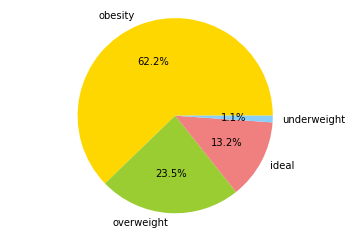

In [ ]:
##pi plot
labels =  'obesity','overweight','ideal','underweight'
sizes = [453, 171, 96, 8]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.4, 0, 0, 0)  # explode 1st slice explode is used to slice a part
# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%',shadow=False)

plt.axis('equal')
plt.show()

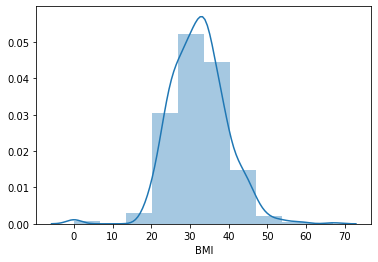

In [ ]:
sns.distplot(newdata.BMI,bins=10)

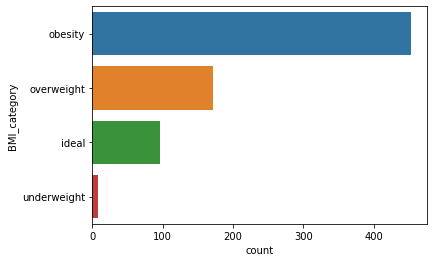

In [ ]:
sns.countplot(y='BMI_category',data=newdata)

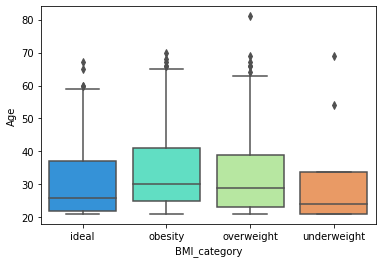

In [ ]:
sns.boxplot(x='BMI_category',y='Age',data=newdata,palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


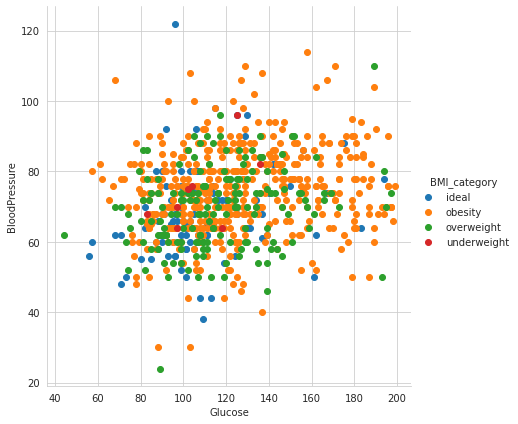

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(newdata, hue="BMI_category", size=6) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend();
plt.show();

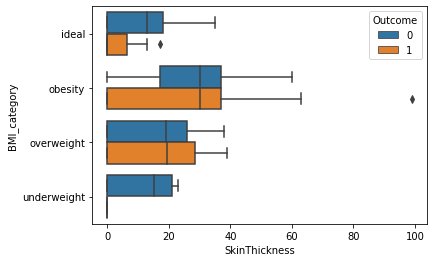

In [ ]:
# categorize my data based on some other categories

sns.boxplot(x="SkinThickness", y="BMI_category", hue="Outcome",data=newdata)

In [ ]:
newdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.862637,121.873626,72.438187,21.388736,84.152473,32.288736,0.476518,33.394231,0.343407
std,3.363422,30.679207,12.386109,15.729793,116.819934,7.277660,0.334851,11.849692,0.475172
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,33.000000,130.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y=newdata[['Outcome','BMI_category']]

In [ ]:
i=y[y.Outcome==0]
p=y[y.Outcome==1]
##p with diabetic
##i with nodiabetic

In [ ]:
i.BMI_category.value_counts()

obesity        249
overweight     133
ideal           89
underweight      7
Name: BMI_category, dtype: int64

In [ ]:
p.BMI_category.value_counts()#with diabetic

obesity        204
overweight      38
ideal            7
underweight      1
Name: BMI_category, dtype: int64

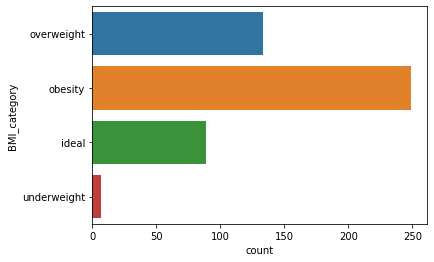

In [ ]:
sns.countplot(y='BMI_category',data=i)

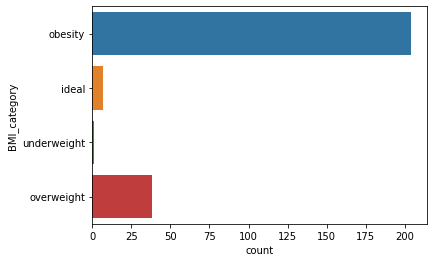

In [ ]:
sns.countplot(y='BMI_category',data=p)

In [ ]:
corr= newdata.corr()

In [ ]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


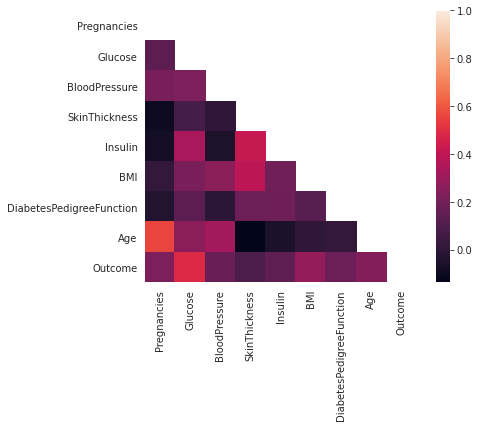

In [ ]:
import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [58]:
h=newdata['BMI']==0
h1=newdata[~h]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


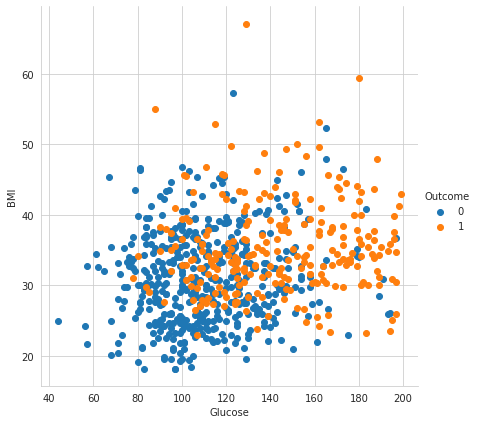

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(h1, hue="Outcome", size=6) \
   .map(plt.scatter, "Glucose", "BMI") \
   .add_legend();
plt.show();